In this section we are going to work with Biophyton, specifically accessing KEGG to study the pathway hsa03030 ("DNA replication" pathway in humans): https://www.genome.jp/dbget-bin/www_bget?pathway+hsa03030

Note: It is important to have biphyton installed first.

In [6]:
from Bio.KEGG import REST

In [8]:
pathway_hsa03030 = REST.kegg_get("hsa03030").read()

In [9]:
type(pathway_hsa03030)

str

In [12]:
pathway_hsa03030[0:200]

'ENTRY       hsa03030                    Pathway\nNAME        DNA replication - Homo sapiens (human)\nDESCRIPTION A complex network of interacting proteins and enzymes is required for DNA replication. Ge'

In [14]:
len(pathway_hsa03030)

4970

In [16]:
for line in pathway_hsa03030.split("\n"): 
    print(line)

ENTRY       hsa03030                    Pathway
NAME        DNA replication - Homo sapiens (human)
DESCRIPTION A complex network of interacting proteins and enzymes is required for DNA replication. Generally, DNA replication follows a multistep enzymatic pathway. At the DNA replication fork, a DNA helicase (DnaB or MCM complex) precedes the DNA synthetic machinery and unwinds the duplex parental DNA in cooperation with the SSB or RPA. On the leading strand, replication occurs continuously in a 5 to 3 direction, whereas on the lagging strand, DNA replication occurs discontinuously by synthesis and joining of short Okazaki fragments. In prokaryotes, the leading strand replication apparatus consists of a DNA polymerase (pol III core), a sliding clamp (beta), and a clamp loader (gamma delta complex). The DNA primase (DnaG) is needed to form RNA primers. Normally, during replication of the lagging-strand DNA template, an RNA primer is removed either by an RNase H or by the 5 to 3 exonucleas

We save the contents of the pathway in a txt file:

In [18]:
with open("pathway_hsa03030.txt", "w") as f:
    f.write(pathway_hsa03030)

print("File saved as pathway_hsa03030.txt")

File saved as pathway_hsa03030.txt


Let's search for the terms MCM2', 'MCM3', 'MCM4', 'PCNA', 'POLD1 in the hsa03030 pathway and count how many times each appears. Then, we plot a bar chart using the matplotlib library.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
search_terms = ['MCM2', 'MCM3', 'MCM4', 'PCNA', 'POLD1']
term_frequency = {}

for term in search_terms:
    count = pathway_hsa03030.lower().count(term.lower())
    term_frequency[term] = count  
    print(f"The term '{term}' appears {count} time(s) in the pathway.")

The term 'MCM2' appears 1 time(s) in the pathway.
The term 'MCM3' appears 1 time(s) in the pathway.
The term 'MCM4' appears 1 time(s) in the pathway.
The term 'PCNA' appears 2 time(s) in the pathway.
The term 'POLD1' appears 1 time(s) in the pathway.


In [32]:
df = pd.DataFrame(list(term_frequency.items()), columns=['Term', 'Count'])

Barplot

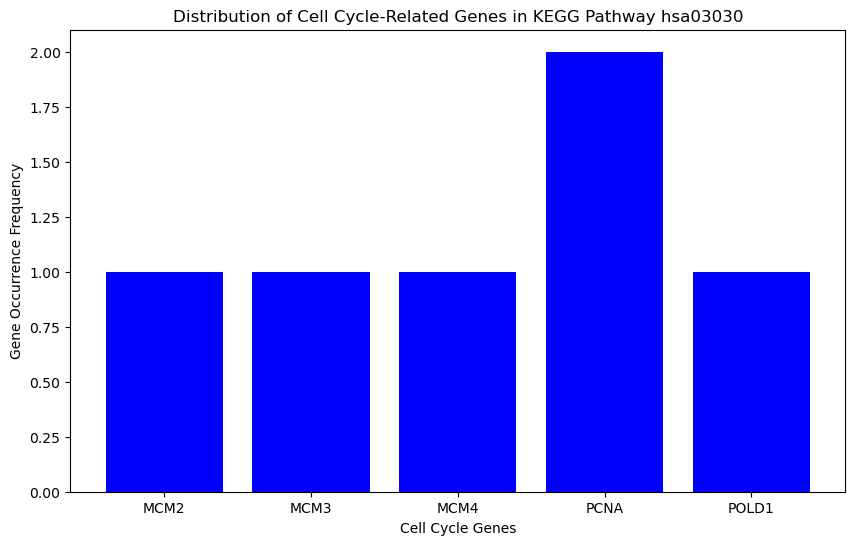

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(df['Term'], df['Count'], color='blue')
plt.xlabel('Cell Cycle Genes')
plt.ylabel('Gene Occurrence Frequency')
plt.title('Distribution of Cell Cycle-Related Genes in KEGG Pathway hsa03030')
plt.show()